In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from importlib_resources import read_text
from matplotlib import pyplot as plt
from typing import List, Tuple, Iterable, Any
from scipy import stats
from statannot import add_stat_annotation

from pltconfig import *

In [2]:
f12c_label_df = pd.read_csv('data/LCMS/062220_f12c_inferred.csv', index_col=0)
num_cols = f12c_label_df.columns[:-2]
pct12c_label_df = f12c_label_df.copy()
pct12c_label_df[num_cols] *= 100

pct12c_label_df.head(12)

,ser,his,val,thr,pro,arg,glu,sample_name,description
sample,,,,,,,,,
AF 1,0.698829,0.373121,0.762315,4.059133,5.136851,7.097073,3.912351,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 2,0.672149,0.693024,0.761784,3.951951,5.286966,7.259233,4.599549,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 3,0.656593,0.981723,0.656178,4.001196,4.637758,7.414453,5.010742,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 4,0.652091,0.620933,0.766840,6.107001,5.732466,7.331974,4.072987,CAfree_bioreactor,"Control ambient air, bioreactor - CAfree:pFE-s..."
AF 5,1.619318,2.897729,1.637058,4.222599,4.151776,10.805272,2.948762,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
AF 6,2.858755,5.817651,2.786002,7.530236,6.820447,17.513521,4.910178,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
AF 7,2.731897,4.289551,7.838287,11.016334,7.825158,19.038049,5.750392,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
AF 8,1.428226,1.428662,1.174766,4.045960,2.831558,8.848715,2.384401,CCMB1_bioreactor,Experiment ambient air bioreactor - CCMB1:pCB'...
100% 13C biomass,1.009879,2.708892,0.885868,1.928990,1.976630,3.657762,2.840441,100% 13C biomass,100% 13C biomass


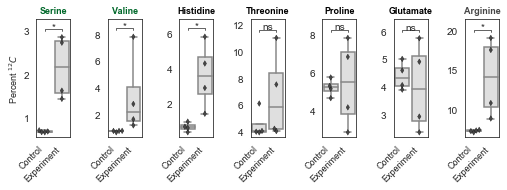

In [3]:
# Figure 5 supplement 1 - LCMS data for each amino acid. 
# Shows that there are significant differences for amino acids where carboxylations are involved in their biosynthesis,
# either due to rubisco (ser, val) due to or carboxyphosphate incorporation into arginine.
plot_order = ['ser', 'val', 'his', 'thr', 'pro', 'glu', 'arg']
aa_names = {'ser': 'Serine',
            'val': 'Valine',
            'his': 'Histidine',
            'thr': 'Threonine',
            'pro': 'Proline',
            'glu': 'Glutamate',
            'arg': 'Arginine'}
colors = {'ser': greens[-1],
          'val': greens[-1],
          'his': 'k',
          'thr': 'k',
          'pro': 'k',
          'glu': 'k',
          'arg': greys[-2]}
n = len(plot_order)

fig = plt.figure(figsize=(7.25, 2.75))
gs = fig.add_gridspec(1, len(plot_order))
lr_order = ['CAfree_bioreactor', 'CCMB1_bioreactor']
stats_pairs = [('CAfree_bioreactor', 'CCMB1_bioreactor')]

for i, aa_col in enumerate(plot_order):
    my_ax = plt.subplot(gs[0, i])
    sns.boxplot(data=pct12c_label_df, x='sample_name', y=aa_col, order=lr_order,
                ax=my_ax, color=greys[1], showfliers=False)
    sns.swarmplot(data=pct12c_label_df, x='sample_name', y=aa_col, order=lr_order,
                  ax=my_ax, color=greys[-2], 
                  marker='d', size=4, edgecolor='k', linewidth=0.3)

    test_results = add_stat_annotation(my_ax, data=pct12c_label_df,
                                       x='sample_name', y=aa_col,
                                       order=lr_order,
                                       box_pairs=stats_pairs,
                                       test='Mann-Whitney', 
                                       text_format='star',
                                       text_offset=-2,
                                       line_height=0.02, 
                                       line_offset=0.08,
                                       linewidth=0.75,
                                       loc='inside',
                                       verbose=0)
    
    plt.xticks([0, 1],[ 'Control', 'Experiment'], fontsize=9, rotation=45, ha='right')
    my_ax.set_title(aa_names[aa_col], color=colors[aa_col], fontsize=9, weight='bold')

    my_ax.set_xlabel('')
    ylabel = 'Percent $^{12}C$'
    if i > 0: ylabel = ''
    my_ax.set_ylabel(ylabel, fontsize=9)

plt.tight_layout()
plt.savefig('fig5/fig5S2.png', dpi=300)
plt.show()

In [4]:
# Load precomputed flux predictions via pFBA
flux_prediction_df = pd.read_csv('data/FBA/ccmb1_fluxes.csv')
rub_pct_range = (flux_prediction_df.rub_pct_3pg_prod.min(), flux_prediction_df.rub_pct_3pg_prod.max())

# Load precomputed flux inferences (from data).
flux_inference_df = pd.read_csv('data/LCMS/062220_flux_inferrence.csv')
flux_inference_df['pct_12co2_inferred'] = flux_inference_df.f12co2_inferred*100
flux_inference_df['ser_pct12c'] = flux_inference_df.ser_f12c*100

flux_inference_df

,sample,sample_name,ser_f12c,val_f12c,his_f12c,rel_rubisco_3PG_flux,f12co2_inferred,description,pct_12co2_inferred,ser_pct12c
0,AF 1,CAfree_bioreactor,0.006988,0.007623,0.003731,NaN,0.230207,"Control ambient air, bioreactor - CAfree:pFE-s...",23.020680,0.698829
1,AF 2,CAfree_bioreactor,0.006721,0.007618,0.006930,NaN,0.205577,"Control ambient air, bioreactor - CAfree:pFE-s...",20.557653,0.672149
2,AF 3,CAfree_bioreactor,0.006566,0.006562,0.009817,NaN,0.194330,"Control ambient air, bioreactor - CAfree:pFE-s...",19.433006,0.656593
3,AF 4,CAfree_bioreactor,0.006521,0.007668,0.006209,NaN,0.236269,"Control ambient air, bioreactor - CAfree:pFE-s...",23.626907,0.652091
4,AF 5,CCMB1_bioreactor,0.016193,0.016371,0.028977,0.115270,0.500878,Experiment ambient air bioreactor - CCMB1:pCB'...,50.087825,1.619318
5,AF 6,CCMB1_bioreactor,0.028588,0.027860,0.058177,0.164450,0.805302,Experiment ambient air bioreactor - CCMB1:pCB'...,80.530231,2.858755
6,AF 7,CCMB1_bioreactor,0.027319,0.078383,0.042896,0.145884,0.854763,Experiment ambient air bioreactor - CCMB1:pCB'...,85.476332,2.731897
7,AF 8,CCMB1_bioreactor,0.014282,0.011748,0.014287,0.112341,0.411703,Experiment ambient air bioreactor - CCMB1:pCB'...,41.170284,1.428226
8,100% 13C biomass,100% 13C biomass,0.010099,0.008859,0.027089,NaN,0.077444,100% 13C biomass,7.744366,1.009879
9,75% 13C biomass,75% 13C biomass,0.244103,0.172412,0.319774,NaN,0.268180,75% 13C biomass,26.818035,24.410256


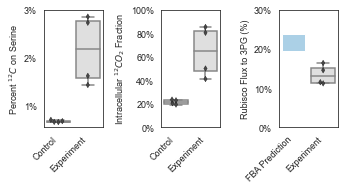

In [22]:
fig = plt.figure(figsize=(7.25, 2.75))
gs = fig.add_gridspec(1, 4, width_ratios=[2.5, 1, 1, 1])

# plot %12C on serine
ax0 = plt.subplot(gs[0, 1])
sns.boxplot(data=flux_inference_df, x='sample_name', y='ser_pct12c', order=['CAfree_bioreactor', 'CCMB1_bioreactor'], ax=ax0, color=greys[1], showfliers=False)
sns.swarmplot(data=flux_inference_df, x='sample_name', y='ser_pct12c', order=['CAfree_bioreactor', 'CCMB1_bioreactor'], ax=ax0, color=greys[-2], 
              marker='d', size=4, edgecolor='k', linewidth=0.3)

yticks = np.arange(1, 3.1, 1)
plt.yticks(yticks, ['%d%%' % y for y in yticks], fontsize=9)
plt.xticks([0, 1],[ 'Control', 'Experiment'], fontsize=9, rotation=45, ha='right')
ax0.set_ylabel('Percent $^{12}C$ on Serine', fontsize=9)
ax0.set_xlabel('')

# plot inferred 12Ci fraction.
ax1 = plt.subplot(gs[0, 2])
sns.boxplot(data=flux_inference_df, x='sample_name', y='pct_12co2_inferred', order=['CAfree_bioreactor', 'CCMB1_bioreactor'], ax=ax1, color=greys[1], showfliers=False)
sns.swarmplot(data=flux_inference_df, x='sample_name', y='pct_12co2_inferred', order=['CAfree_bioreactor', 'CCMB1_bioreactor'], ax=ax1, color=greys[-2], 
              marker='d', size=4, edgecolor='k', linewidth=0.3)

yticks = np.arange(0, 101, 20)
plt.yticks(yticks, ['%d%%' % y for y in yticks], fontsize=9)
plt.xticks([0, 1], ['Control', 'Experiment'], fontsize=9, rotation=45, ha='right')
ax1.set_xlabel('')
ax1.set_ylabel('Intracellular $^{12}CO_2$ Fraction', fontsize=9)


# Estimated flux through rubisco as compared to FBA predictions
ax2 = plt.subplot(gs[0, 3])

inferred_rub_flux = (flux_inference_df[flux_inference_df.sample_name == 'CCMB1_bioreactor'].rel_rubisco_3PG_flux*100).values.tolist()
n_exps = len(inferred_rub_flux)

# TODO - actually use prediction here.
width = 0.8
xy = (-width/2, rub_pct_range[0])
height = rub_pct_range[1] - rub_pct_range[0]
fba_rect = plt.Rectangle(xy, width, height, facecolor=blues[2])
ax2.add_patch(fba_rect)

sns.boxplot(x=[1]*n_exps, y=inferred_rub_flux, order=[0, 1], ax=ax2, color=greys[1], showfliers=False)
sns.swarmplot(x=[1]*n_exps, y=inferred_rub_flux, order=[0, 1], ax=ax2, color=greys[-2],
              marker='d', size=4, edgecolor='k', linewidth=0.3)

#plt.scatter([1]*n_exps, inferred_rub_flux, marker='d', s=12, color=greys[-2])
#sns.swarmplot(x=[1]*4, y=inferred_rub_flux, ax=ax2, color=greys[-2], marker='d')

yticks = np.arange(0, 31, 10)
plt.yticks(yticks, ['%d%%' % y for y in yticks], fontsize=9)
plt.xticks([0, 1],['FBA Prediction', 'Experiment'], fontsize=9, rotation=45, ha='right')
ax2.set_ylabel('Rubisco Flux to 3PG (%)', fontsize=9)
ax2.set_xlabel('')
ax2.set_ylim(0, 30)
ax2.set_xlim(-0.5, 1.5)

plt.tight_layout()
plt.savefig('fig5/fig5S3.png', dpi=300)
plt.show()

In [6]:
exps = flux_inference_df[flux_inference_df.sample_name == 'CCMB1_bioreactor']
mean_exp = exps.rel_rubisco_3PG_flux.mean() * 100
std_exp = exps.rel_rubisco_3PG_flux.std() * 100
print('Mean rubisco flux fraction %.1f%% +/- %.1f%%' % (mean_exp, std_exp))

Mean rubisco flux fraction 13.4% +/- 2.5%


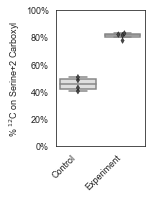

In [38]:
# Figure 5 - figure supplement 3
# Secondary fragmentation of serine+2, measuring fraction of the serine carboxyls that are 12C.
# Given that 2/3 of the carbons are 13C (ser +2 peak) the naive odds *should* be 33% that the 
# unlabeled carbon is the carboxyl. The control gives a mean value around 45%, suggesting that
# this is a good baseline in the absence of rubisco due to other carboxylase reactions in central
# metabolism. 
serine_frag_df = pd.read_csv('data/LCMS/062220_ser_secondary_fragmentation.csv', index_col=0)
serine_frag_df['ser_plus2_carboxyl_pct12c'] = 100*serine_frag_df['ser_plus2_carboxyl_f12c']
# We expect this fraction to be higher for the experiment since this is the specific carbon deriving 
# from fixation by rubisco. The difference between experiment and control should reflect the balance
# of fluxes between rubisco and glycolytic metabolism of glycerol, as above. 

# When rubisco carboxylates 100% 13C RuBP this will always produce one +3 3PG and one +2 3PG,
# i.e. where the second has a 12C only at the carboxyl position. If we naively assume that the 
# population +2 serines derives from a mixture of glycolytic 3PG labeled as in the control.
# 0.5x + 0.456y = 0.810
# y = 1.0 - x

plt.figure(figsize=(1.6, 2.5))
lr_order = ['CAfree_bioreactor', 'CCMB1_bioreactor']
sns.boxplot(data=serine_frag_df, x='sample_name', y='ser_plus2_carboxyl_pct12c',
            order=lr_order, color=greys[1], showfliers=False)
sns.swarmplot(data=serine_frag_df, x='sample_name', y='ser_plus2_carboxyl_pct12c',
              order=lr_order, color=greys[-2], 
              marker='d', size=4, edgecolor='k', linewidth=0.3)

yticks = np.arange(0, 101, 20)
plt.yticks(yticks, ['%d%%' % y for y in yticks], fontsize=9)
plt.xticks([0, 1], ['Control', 'Experiment'], fontsize=9, rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('% $^{12}$C on Serine+2 Carboxyl', fontsize=9)

plt.show()

In [52]:
f_ser_plus2 = 0.0595
f12co2_exp = 0.64
f12co2_control = 0.215
f_ser_plus2_carboxyl_12c_exp = 0.810
f_ser_plus2_carboxyl_12c_control = 0.456
f_ser_carbox_exp_rescaled = f_ser_plus2_carboxyl_12c_exp / f12co2_exp
f_ser_carbox_control_rescaled = (f12co2_exp/f12co2_control)*f_ser_plus2_carboxyl_12c_control
print('%.2f' % f_ser_carbox_exp_rescaled)
print('%.2f' % f_ser_carbox_control_rescaled)

f_rub_ser_plus2_production = ((f_ser_carbox_exp_rescaled - f_ser_carbox_control_rescaled)/
                              (1.0 - f_ser_carbox_control_rescaled))

print('%.2f' % f_rub_ser_plus2_production)

f_rub_ser_production = f_rub_ser_plus2_production*f_ser_plus2
100*f_rub_ser_production

#serine_frag_df.groupby('sample_name').mean()


1.27
1.36
0.26


1.527813882743362